In [60]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelBinarizer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report

from seaborn import heatmap

In [37]:
df = pd.read_csv("mars_train.csv", header=None, skiprows=0)
df

,0,1,2,3,4,5,6,7,8,9,...,3591,3592,3593,3594,3595,3596,3597,3598,3599,3600
0,0,0.29347,0.097823,0.034586,0.034586,0.0,0.0,0,0.00000,0,...,0,0.60678,0.20226,0.14302,0.14302,0.13484,0.40452,0,0.57208,1
1,0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0,0.12274,0,...,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,1
2,0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0,0.00000,0,...,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,1
3,0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0,0.00000,0,...,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,1
4,0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0,0.00000,0,...,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0,0.00000,0,...,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,2
1676,0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0,0.00000,0,...,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,2
1677,0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0,0.00000,0,...,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,2
1678,0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0,0.00000,0,...,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,2


In [38]:
#Verifier qu'il n y a pas de valeurs manquantes
df.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
3596    0
3597    0
3598    0
3599    0
3600    0
Length: 3601, dtype: int64

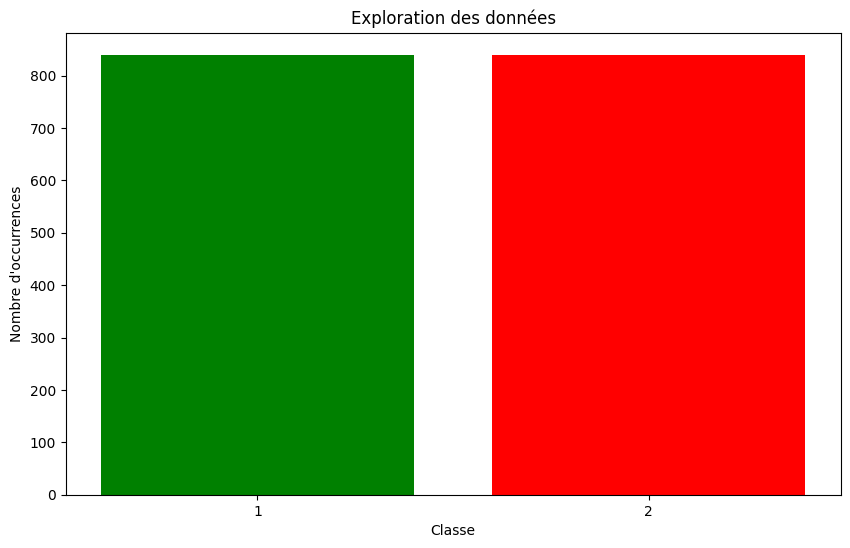

In [39]:
# La dernière colonne soit la colonne -1 (dernière colonne)
labels = df.iloc[:, -1].unique()
counts = df.iloc[:, -1].value_counts()

# Couleurs
colors = ['green', 'red']  # Tu peux ajuster les couleurs selon tes préférences

# Création du graphique
plt.figure(figsize=(10, 6))

for i, label in enumerate(labels):
    plt.bar(str(label), counts[label], color=colors[i])

plt.title("Exploration des données")
plt.xlabel("Classe")
plt.ylabel("Nombre d'occurrences")
plt.show()

In [40]:
X = df.drop(df.columns[-1], axis=1)  # Caractéristiques sans la dernière colonne
y = df.iloc[:, -1]  # Dernière colonne comme étiquettes

# Affichage des valeurs uniques et de leurs occurrences dans y (les étiquettes)
y.value_counts()

3600
1    840
2    840
Name: count, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Affichage des tailles des ensembles
print("Taille de l'ensemble d'entraînement :", X_train.shape)
print("Taille de l'ensemble de validation :", X_test.shape)

y_train.value_counts()

Taille de l'ensemble d'entraînement : (1344, 3600)
Taille de l'ensemble de validation : (336, 3600)


3600
2    680
1    664
Name: count, dtype: int64

In [45]:
# Création du modèle de régression logistique
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Création du modèle SVM
svm_model = SVC(kernel='linear', probability=True, random_state=42)  # Choisis le noyau approprié et d'autres paramètres si nécessaire
svm_model.fit(X_train, y_train)

# Création du modèle de forêt aléatoire
rndmForest_model = RandomForestClassifier(n_estimators=100, random_state=42) 
rndmForest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Mean cross_val accuracy =  0.8277183600713013
Accuracy: 0.8303571428571429
              precision    recall  f1-score   support

           1       0.84      0.83      0.84       176
           2       0.82      0.83      0.82       160

    accuracy                           0.83       336
   macro avg       0.83      0.83      0.83       336
weighted avg       0.83      0.83      0.83       336



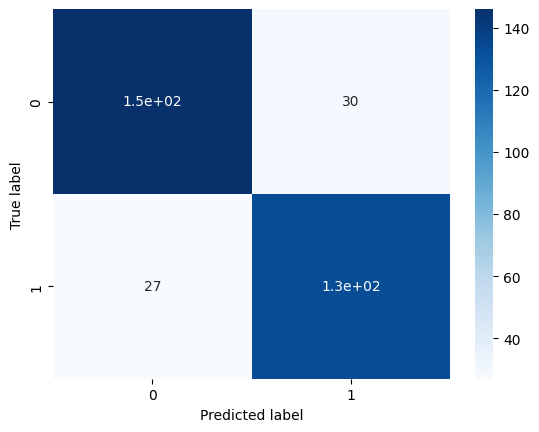

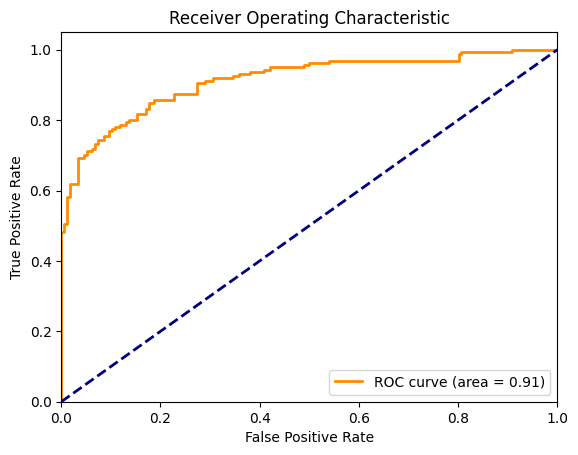

Accuracy on the training set: 0.9895833333333334
Accuracy on the testing set: 0.8303571428571429


In [54]:
#Check validation for Logistic regression
accuracy = model_selection.cross_val_score(logistic_model, X_test, y_test, cv = 10).mean()
print("Mean cross_val accuracy = ", accuracy)
logistic_predictions = logistic_model.predict(X_test)

#Model Evaluation
print("Accuracy:", accuracy_score(y_test, logistic_predictions))
print(classification_report(y_test, logistic_predictions))

#CONFUSION MATRIX
cm = confusion_matrix(y_test, logistic_predictions)
heatmap(cm, annot=True, cmap="Blues") #heatmap
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

#Courbe ROC
lb = LabelBinarizer()  # Transforme les étiquettes en valeurs binaires (0, 1)
y_train_binary = lb.fit_transform(y_train) 
y_test_binary = lb.transform(y_test)
pred_score = logistic_model.predict_proba(X_test)
FPr, TPr, _ = roc_curve(y_test_binary, pred_score[:, 1])
roc_auc = auc(FPr, TPr)
plt.plot(FPr, TPr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#Checking : overfiting
print("Accuracy on the training set:", accuracy_score(y_train, logistic_model.predict(X_train)))
print("Accuracy on the testing set:", accuracy_score(y_test, logistic_predictions))

Mean cross_val accuracy =  0.8097147950089125
Accuracy: 0.7916666666666666
              precision    recall  f1-score   support

           1       0.81      0.78      0.80       176
           2       0.77      0.80      0.79       160

    accuracy                           0.79       336
   macro avg       0.79      0.79      0.79       336
weighted avg       0.79      0.79      0.79       336



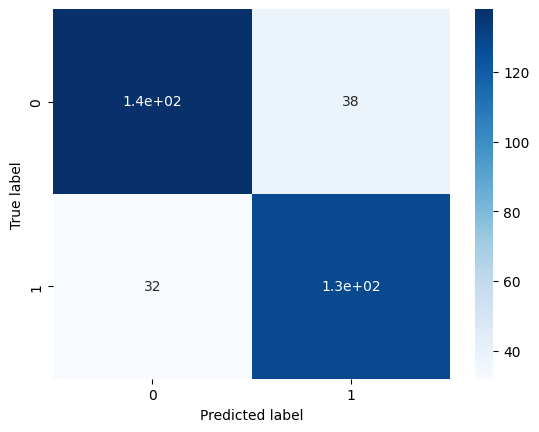

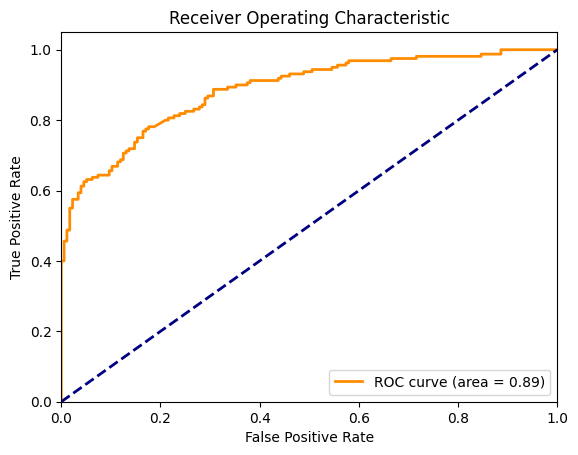

Accuracy on the training set: 1.0
Accuracy on the testing set: 0.7916666666666666


In [55]:
#Check validation for SVM
accuracy = model_selection.cross_val_score(svm_model, X_test, y_test, cv = 10).mean()
print("Mean cross_val accuracy = ", accuracy)
svm_predictions = svm_model.predict(X_test)

#Model Evaluation
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

#CONFUSION MATRIX
cm = confusion_matrix(y_test, svm_predictions)
heatmap(cm, annot=True, cmap="Blues") #heatmap
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

#Courbe ROC
lb = LabelBinarizer()  # Transforme les étiquettes en valeurs binaires (0, 1)
y_train_binary = lb.fit_transform(y_train) 
y_test_binary = lb.transform(y_test)
pred_score = svm_model.predict_proba(X_test)
FPr, TPr, _ = roc_curve(y_test_binary, pred_score[:, 1])
roc_auc = auc(FPr, TPr)
plt.plot(FPr, TPr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#Checking : overfiting
print("Accuracy on the training set:", accuracy_score(y_train, svm_model.predict(X_train)))
print("Accuracy on the testing set:", accuracy_score(y_test, svm_predictions))

Mean cross_val accuracy =  0.7795900178253119
Accuracy: 0.7886904761904762
              precision    recall  f1-score   support

           1       0.85      0.73      0.78       176
           2       0.74      0.86      0.79       160

    accuracy                           0.79       336
   macro avg       0.79      0.79      0.79       336
weighted avg       0.80      0.79      0.79       336



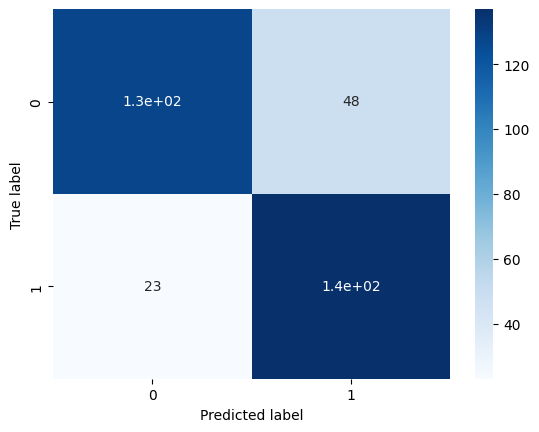

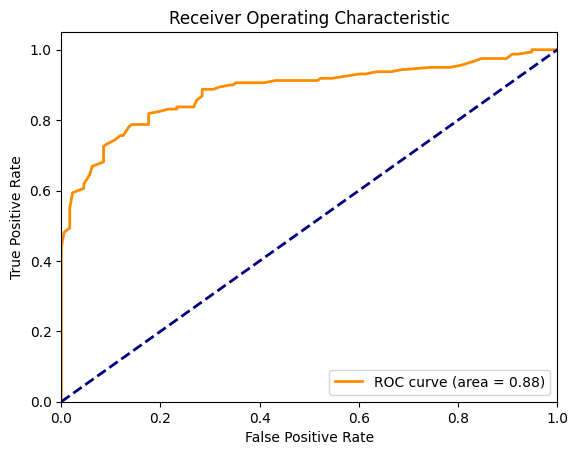

Accuracy on the training set: 1.0
Accuracy on the testing set: 0.7886904761904762


In [56]:
#Check validation for RandomForest
accuracy = model_selection.cross_val_score(rndmForest_model, X_test, y_test, cv = 10).mean()
print("Mean cross_val accuracy = ", accuracy)
rndmForest_predictions = rndmForest_model.predict(X_test)

#Model Evaluation
print("Accuracy:", accuracy_score(y_test, rndmForest_predictions))
print(classification_report(y_test, rndmForest_predictions))

#CONFUSION MATRIX
cm = confusion_matrix(y_test, rndmForest_predictions)
heatmap(cm, annot=True, cmap="Blues") #heatmap
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

#Courbe ROC
lb = LabelBinarizer()  # Transforme les étiquettes en valeurs binaires (0, 1)
y_train_binary = lb.fit_transform(y_train) 
y_test_binary = lb.transform(y_test)
pred_score = rndmForest_model.predict_proba(X_test)
FPr, TPr, _ = roc_curve(y_test_binary, pred_score[:, 1])
roc_auc = auc(FPr, TPr)
plt.plot(FPr, TPr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#Checking : overfiting
print("Accuracy on the training set:", accuracy_score(y_train, rndmForest_model.predict(X_train)))
print("Accuracy on the testing set:", accuracy_score(y_test, rndmForest_predictions))

In [59]:
# Définir les hyperparamètres à tester pour chaque modèle
param_grid_logistic = {'C': [0.1, 1, 10]}
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
param_grid_forest = {'n_estimators': [50, 100, 200]}

# Création des objets GridSearchCV pour chaque modèle
logistic_grid = GridSearchCV(LogisticRegression(), param_grid_logistic, cv=5)
svm_grid = GridSearchCV(SVC(), param_grid_svm, cv=5)
forest_grid = GridSearchCV(RandomForestClassifier(), param_grid_forest, cv=5)

# Ajustement des modèles avec GridSearchCV sur les données d'entraînement
logistic_grid.fit(X_train, y_train)
svm_grid.fit(X_train, y_train)
forest_grid.fit(X_train, y_train)

# Meilleurs hyperparamètres pour chaque modèle
print("Meilleurs hyperparamètres Régression logistique :", logistic_grid.best_params_)
print("Meilleurs hyperparamètres SVM :", svm_grid.best_params_)
print("Meilleurs hyperparamètres Forêt aléatoire :", forest_grid.best_params_)

Meilleurs hyperparamètres Régression logistique : {'C': 0.1}
Meilleurs hyperparamètres SVM : {'C': 10, 'gamma': 0.1}
Meilleurs hyperparamètres Forêt aléatoire : {'n_estimators': 50}


In [66]:
# Prédiction sur l'ensemble de validation
logistic_pred = logistic_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
forest_pred = rndmForest_model.predict(X_test)

# Calcul des métriques
logistic_accuracy = accuracy_score(y_test, logistic_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
forest_accuracy = accuracy_score(y_test, forest_pred)

# Affichage des performances
print("Accuracy Régression logistique :", logistic_accuracy)
print("Accuracy SVM :", svm_accuracy)
print("Accuracy Random Forest :", forest_accuracy)

Accuracy Régression logistique : 0.8303571428571429
Accuracy SVM : 0.7916666666666666
Accuracy Random Forest : 0.7886904761904762


In [69]:
# Rapport de classification pour chaque modèle
print("Rapport de classification Régression logistique :\n", classification_report(y_test, logistic_pred))
print("Rapport de classification SVM :\n", classification_report(y_test, svm_pred))
print("Rapport de classification Random Forest :\n", classification_report(y_test, forest_pred))

Rapport de classification Régression logistique :
               precision    recall  f1-score   support

           1       0.84      0.83      0.84       176
           2       0.82      0.83      0.82       160

    accuracy                           0.83       336
   macro avg       0.83      0.83      0.83       336
weighted avg       0.83      0.83      0.83       336

Rapport de classification SVM :
               precision    recall  f1-score   support

           1       0.81      0.78      0.80       176
           2       0.77      0.80      0.79       160

    accuracy                           0.79       336
   macro avg       0.79      0.79      0.79       336
weighted avg       0.79      0.79      0.79       336

Rapport de classification Random Forest :
               precision    recall  f1-score   support

           1       0.85      0.73      0.78       176
           2       0.74      0.86      0.79       160

    accuracy                           0.79       336
 

In [70]:

# Évaluation des performances avec validation croisée

logistic_scores = cross_val_score(logistic_grid.best_estimator_, X_test, y_test, cv=5)
svm_scores = cross_val_score(svm_grid.best_estimator_, X_test, y_test, cv=5)
forest_scores = cross_val_score(forest_grid.best_estimator_, X_test, y_test, cv=5)

# Affichage des scores moyens
print("Score moyen Regression logistique :", logistic_scores.mean())
print("Score moyen SVM :", svm_scores.mean())
print("Score moyen Forêt aléatoire :", forest_scores.mean())

Score moyen Regression logistique : 0.8187445127304652
Score moyen SVM : 0.8066286215978928
Score moyen Forêt aléatoire : 0.771027216856892


In [71]:
#On choisit Un modèle de ces 3 (Logistic!!)
""" Une fois on sélectionne le meilleur modèle, on l'utilise pour prédire les classes (1 ou 2) pour "mars_unknown.csv". 
Génère un fichier CSV contenant les prédictions pour ces données.
Évaluation du modèle final : Évalue la performance du modèle final sur les données inconnues. """

' Une fois on sélectionne le meilleur modèle, on l\'utilise pour prédire les classes (1 ou 2) pour "mars_unknown.csv". \nGénère un fichier CSV contenant les prédictions pour ces données.\nÉvaluation du modèle final : Évalue la performance du modèle final sur les données inconnues. '